### SMAC search using the custom Search and SMACSearch classes
This notebook makes use of the SMACSearch class to run a search for a specified set of parameters

In [1]:
# Imports
import os, sys
p = os.path.abspath('../..')
sys.path.insert(1, p)
from search import SMACSearch
from utils import add_to_autosklearn_pipeline

In [3]:
# Experiment parameters
dataset = 'Cardiotocography'
dataset_iter = 1
classifiers = [
    'CBLOFClassifier',
    'COPODClassifier',
    'IForestClassifier',
    'KNNClassifier',
    'LOFClassifier',
]
total_budget = 600
per_run_budget = 30
validation_strategy = 'balanced'
validation_size = 200
output_dir = 'misc_output'
#
# Add classifiers to Auto-Sklearn
add_to_autosklearn_pipeline(classifiers)

Running Search:
  Dataset:	 Cardiotocography 1
  Type:		 smac
  Budget:	 600
  Validation:	 (balanced, 200)
  Classifiers:	 ['CBLOFClassifier', 'COPODClassifier', 'IForestClassifier', 'KNNClassifier', 'LOFClassifier']
Outliers in train_eval set: 349
Outliers in training set: 249
Outliers in validation set: 100
Percentage of outliers in train_eval set: 0.22018927444794953
Percentage of outliers in training set: 0.17978339350180506
Percentage of outliers in validation set: 0.5
[WARNING] [2022-07-26 18:01:51,430:Client-autosklearn.automl_common.common.utils.backend] Directory /tmp/auto-sklearn_tmp_8141bb51-0cf2-11ed-88c5-bbfcf3efb966/.auto-sklearn/ensembles does not exist


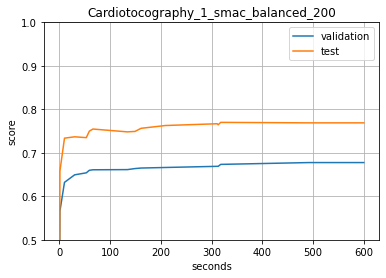

auto-sklearn results:
  Dataset name: Cardiotocography1
  Metric: roc_auc
  Best validation score: 0.677600
  Number of target algorithm runs: 298
  Number of successful target algorithm runs: 288
  Number of crashed target algorithm runs: 9
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

 rank_test_scores  status param_classifier:__choice__  mean_test_score  mean_fit_time  metric_roc_auc  metric_average_precision
                1 Success           IForestClassifier          0.67760       4.735147         0.67760                  0.676521
                1 Success           IForestClassifier          0.67760       1.601854         0.67760                  0.676521
                3 Success           IForestClassifier          0.67490       1.875384         0.67490                  0.673590
                4 Success           IForestClassifier          0.67440       1.376788         0.67440                  

<Figure size 432x288 with 0 Axes>

In [4]:
# SMAC search
smac_search = SMACSearch(
    dataset_name=dataset,
    dataset_iter=dataset_iter,
    classifiers=classifiers,
    validation_strategy=validation_strategy,
    validation_size=validation_size,
    total_budget=total_budget,
    per_run_budget=per_run_budget,
    output_dir=output_dir
)
# Run search
smac_search.run()
# Print results
smac_search.plot_scores()
smac_search.print_summary()
smac_search.print_rankings()
smac_search.save_results()

In [12]:
smac_search.performance_over_time

,Timestamp,single_best_optimization_score,single_best_train_score,single_best_test_score
0,2022-07-26 17:52:05,0.3220,0.0,0.229587
1,2022-07-26 17:52:06,0.5661,0.0,0.658161
2,2022-07-26 17:52:06,0.5661,0.0,0.658161
3,2022-07-26 17:52:06,0.5661,0.0,0.658161
4,2022-07-26 17:52:06,0.5661,0.0,0.658161
...,...,...,...,...
283,2022-07-26 18:00:17,0.6776,0.0,0.768920
284,2022-07-26 18:00:17,0.6776,0.0,0.768920
285,2022-07-26 18:00:17,0.6776,0.0,0.768920
286,2022-07-26 18:00:17,0.6776,0.0,0.768920


In [17]:
smac_search.cv_results[smac_search.cv_results['rank_test_scores']==1]

,mean_test_score,metric_roc_auc,metric_average_precision,mean_fit_time,params,rank_test_scores,status,budgets,param_classifier:__choice__,param_data_preprocessor:__choice__,...,param_classifier:IForestClassifier:max_features,param_classifier:IForestClassifier:max_samples,param_classifier:IForestClassifier:n_estimators,param_classifier:KNNClassifier:contamination,param_classifier:KNNClassifier:method,param_classifier:KNNClassifier:n_neighbors,param_classifier:KNNClassifier:p,param_classifier:LOFClassifier:contamination,param_classifier:LOFClassifier:n_neighbors,param_classifier:LOFClassifier:p
270,0.6776,0.6776,0.676521,1.601854,"{'classifier:__choice__': 'IForestClassifier',...",1,Success,0.0,IForestClassifier,NoPreprocessing,...,1.0,0.8,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,0.6776,0.6776,0.676521,4.735147,"{'classifier:__choice__': 'IForestClassifier',...",1,Success,0.0,IForestClassifier,NoPreprocessing,...,1.0,0.8,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
